# Analyze the data from MMF speckles

### Load stuffs

In [1]:
%load_ext autoreload
%autoreload 2

from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

from mmfsim.grid import Grid
from mmfsim.fiber import StepIndexFiber, GrinFiber
from mmfsim.speckle import StepIndexSpeckle, GrinSpeckle

### Generate speckles

c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:247: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(v**2 - u**2)
c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:248: RuntimeWarning: invalid value encountered in divide
  return sp.jv(n, u) / (u * sp.jv(n - 1, u)) + sp.kn(n, w) / (w * sp.kn(n - 1, w))


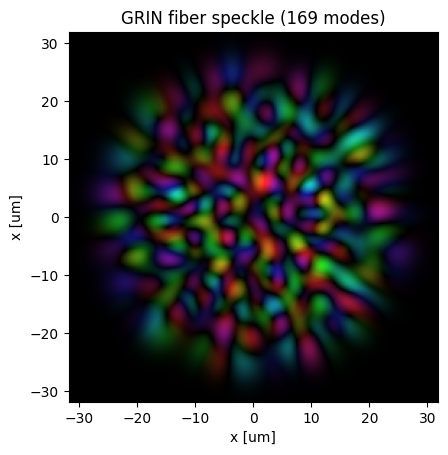

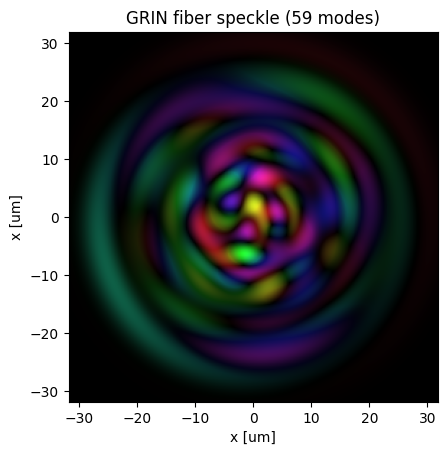

In [41]:
grid = Grid(pixel_size=0.25e-6, pixel_numbers=(256,256))

step_fiber = StepIndexFiber(radius=25e-6, wavelength=1064e-9)
step_speckle = StepIndexSpeckle(step_fiber, grid, N_modes=step_fiber._N_modes)
step_speckle.compose()
_ = step_speckle.plot(complex=True, complex_hsv=True, display_core=False)

grin_fiber = GrinFiber(radius=25e-6, wavelength=1064e-9)
grin_speckle = GrinSpeckle(grin_fiber, grid, N_modes=grin_fiber._N_modes)
grin_speckle.compose()
_ = grin_speckle.plot(complex=True, complex_hsv=True, display_core=False)

### Plot and display statistics

In [46]:
def plot_real_imag(speckle: np.ndarray):
    speckle = speckle / np.max(np.abs(speckle))

    fig, axs = plt.subplots(1, 2, figsize=(10,3))
    pl0 = axs[0].imshow(np.real(speckle), cmap='bwr', vmin=-np.max(np.abs(np.real(speckle))), vmax=+np.max(np.abs(np.real(speckle))))
    pl1 = axs[1].imshow(np.imag(speckle), cmap='bwr', vmin=-np.max(np.abs(np.imag(speckle))), vmax=+np.max(np.abs(np.imag(speckle))))
    _ = [plt.colorbar(pl, ax=axs[i]) for i, pl in enumerate([pl0, pl1])]
    _ = [axs[i].set_title(title) for i, title in enumerate(['Real part', 'Imag part'])]
    plt.show()


def plot_distribs(speckle: np.ndarray):
    speckle = speckle / np.max(np.abs(speckle))
    fig, axs = plt.subplots(1, 2, figsize=(10,3))
    pl0 = axs[0].hist(np.real(speckle.flatten()), bins=100, log=True)
    pl1 = axs[1].hist(np.imag(speckle.flatten()), bins=100, log=True)
    _ = [axs[i].set_title(title) for i, title in enumerate(['Real part', 'Imag part'])]
    plt.show()

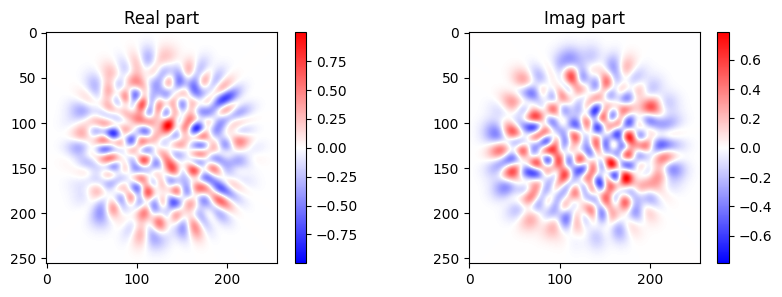

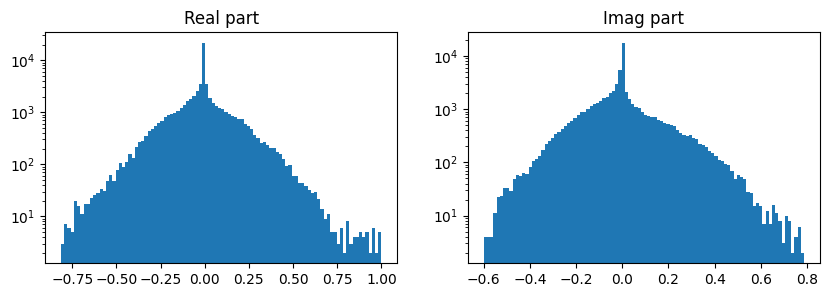

In [47]:
plot_real_imag(step_speckle.field)
plot_distribs(step_speckle.field)

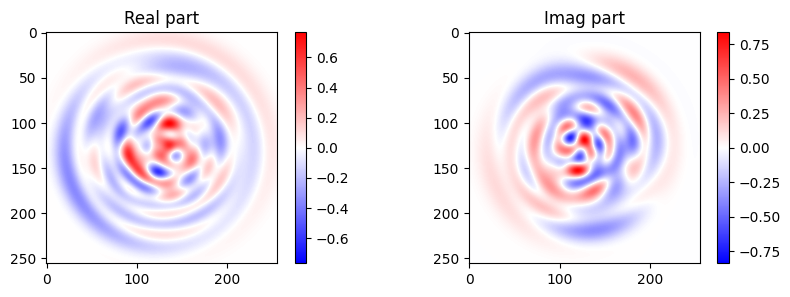

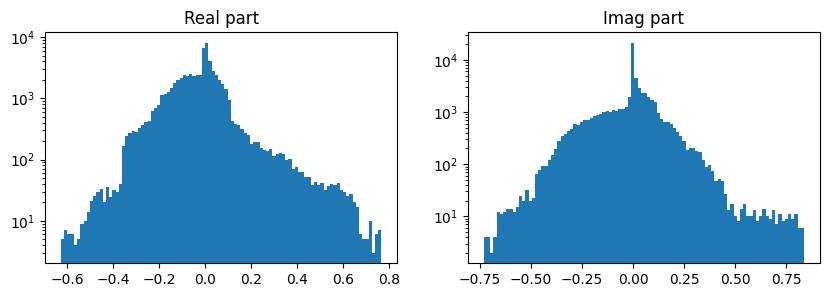

In [48]:
plot_real_imag(grin_speckle.field)
plot_distribs(grin_speckle.field)